# Handwritten digit recognition neural network model

## Installing necessary libraries

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy
!pip install matplotlib

## Importing necessary libraries

In [2]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Data checking and preprocessing

In [3]:
IMG_SIZE = 28
data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

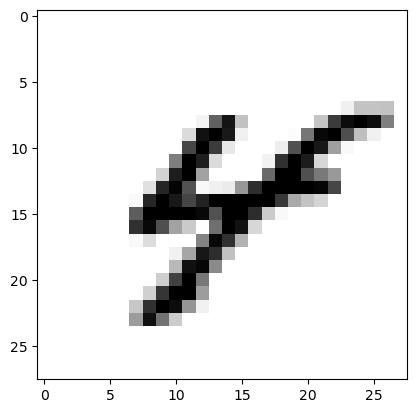

In [5]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)], cmap = plt.cm.binary)

In [6]:
x_train[random.randint(0,len(x_train)-1)]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 123, 245, 253, 253,
        254, 218, 148, 148,  60,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

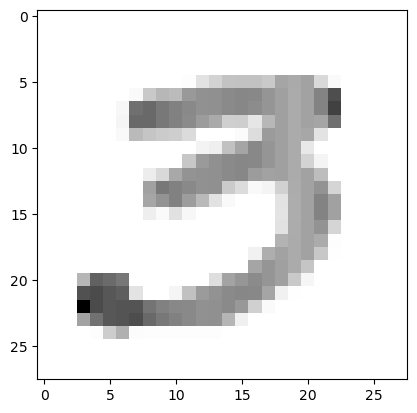

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[random.randint(0,len(x_train)-1)], cmap=plt.cm.binary)

5

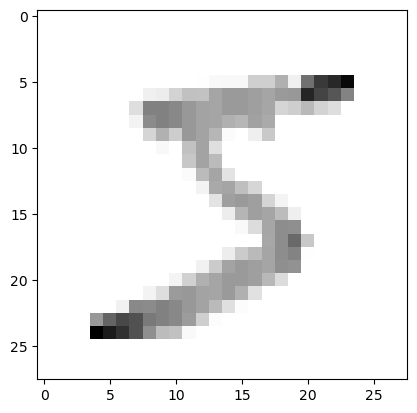

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
y_train[0]

In [9]:
x_train_res = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test_res = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x_train_res.shape, x_test_res.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Creating and configurating model

### Main model creating and adding 1st convolution layer

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = x_train_res.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding 2nd convolution layer

In [11]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Adding 3d convolution layer

In [12]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Adding 1st fully connected layer

In [13]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

### Adding 2nd fully connected layer

In [14]:
model.add(Dense(32))
model.add(Activation('relu'))

### Adding 3d fully connected layer 

In [15]:
model.add(Dense(10))
model.add(Activation('softmax'))

## Summarizing prepared model

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

## Model fitting and test predictions

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(x_train_res, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7729 - loss: 0.6766 - val_accuracy: 0.9599 - val_loss: 0.1258
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9682 - loss: 0.1105 - val_accuracy: 0.9631 - val_loss: 0.1157
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9763 - loss: 0.0762 - val_accuracy: 0.9747 - val_loss: 0.0820
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9813 - loss: 0.0597 - val_accuracy: 0.9741 - val_loss: 0.0890
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9850 - loss: 0.0467 - val_accuracy: 0.9801 - val_loss: 0.0659


In [18]:
test_loss, test_acc = model.evaluate(x_test_res, y_test)
print(test_loss, test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9777 - loss: 0.0795
0.06429889798164368 0.982200026512146


In [19]:
predictions = model.predict([x_test_res])
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.6114391e-06, 4.1294566e-05, 3.8814638e-04, ..., 9.9954647e-01,
        1.6802906e-08, 7.9444089e-07],
       [1.6172051e-04, 5.7370507e-06, 9.9982262e-01, ..., 2.7119142e-06,
        2.0699226e-06, 5.2326061e-07],
       [2.2681063e-06, 9.9994802e-01, 2.6640760e-07, ..., 1.9556308e-06,
        2.7007068e-06, 9.2985069e-08],
       ...,
       [4.2821005e-09, 1.9373580e-07, 4.5489443e-09, ..., 5.8182775e-07,
        2.9663950e-06, 5.9581689e-05],
       [4.1754629e-06, 1.6362522e-09, 1.0842540e-09, ..., 1.1866437e-09,
        1.8312484e-04, 1.4671475e-06],
       [3.5604065e-05, 2.4023977e-08, 8.0635422e-05, ..., 1.2874196e-09,
        3.1260697e-05, 2.2319364e-06]], dtype=float32)

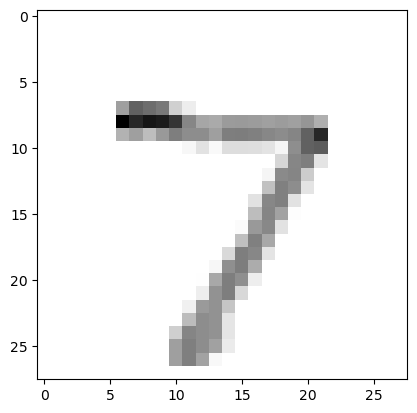

7

In [20]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
np.argmax(predictions[0])

## Custom image testing

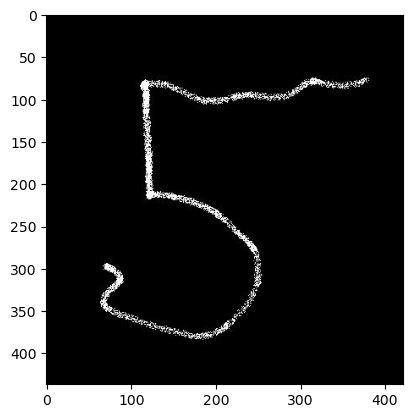

In [34]:
custom_img = cv2.imread('custom_img.png')
plt.imshow(custom_img)

In [35]:
custom_img.shape

(437, 422, 3)

In [36]:
gray = cv2.cvtColor(custom_img, cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
resize.shape

(28, 28)

In [37]:
custom_img = tf.keras.utils.normalize(resize, axis=1)
custom_img = np.array(custom_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
custom_predictions = model.predict(custom_img)
np.argmax(custom_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


5